# Data Project - Stock Market Analysis

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,AMAZON
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,AMAZON
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,AMAZON
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided.

In [2]:
# Summary Stats
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,116.033940,117.483227,114.883112,116.231335,116.231335,2.555701e+07
std,17.094884,17.098194,17.043747,17.061526,17.061526,1.062831e+07
min,86.720001,88.209999,85.570000,86.459999,86.459999,8.828600e+06
25%,99.777500,101.680000,98.724998,100.889999,100.889999,1.925575e+07
50%,121.099998,122.750000,120.059998,121.260002,121.260002,2.275420e+07
75%,130.974998,132.569000,130.032501,131.455002,131.455002,2.821805e+07
max,142.160004,142.380005,139.839996,141.699997,141.699997,9.779860e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [3]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-05 to 2023-12-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

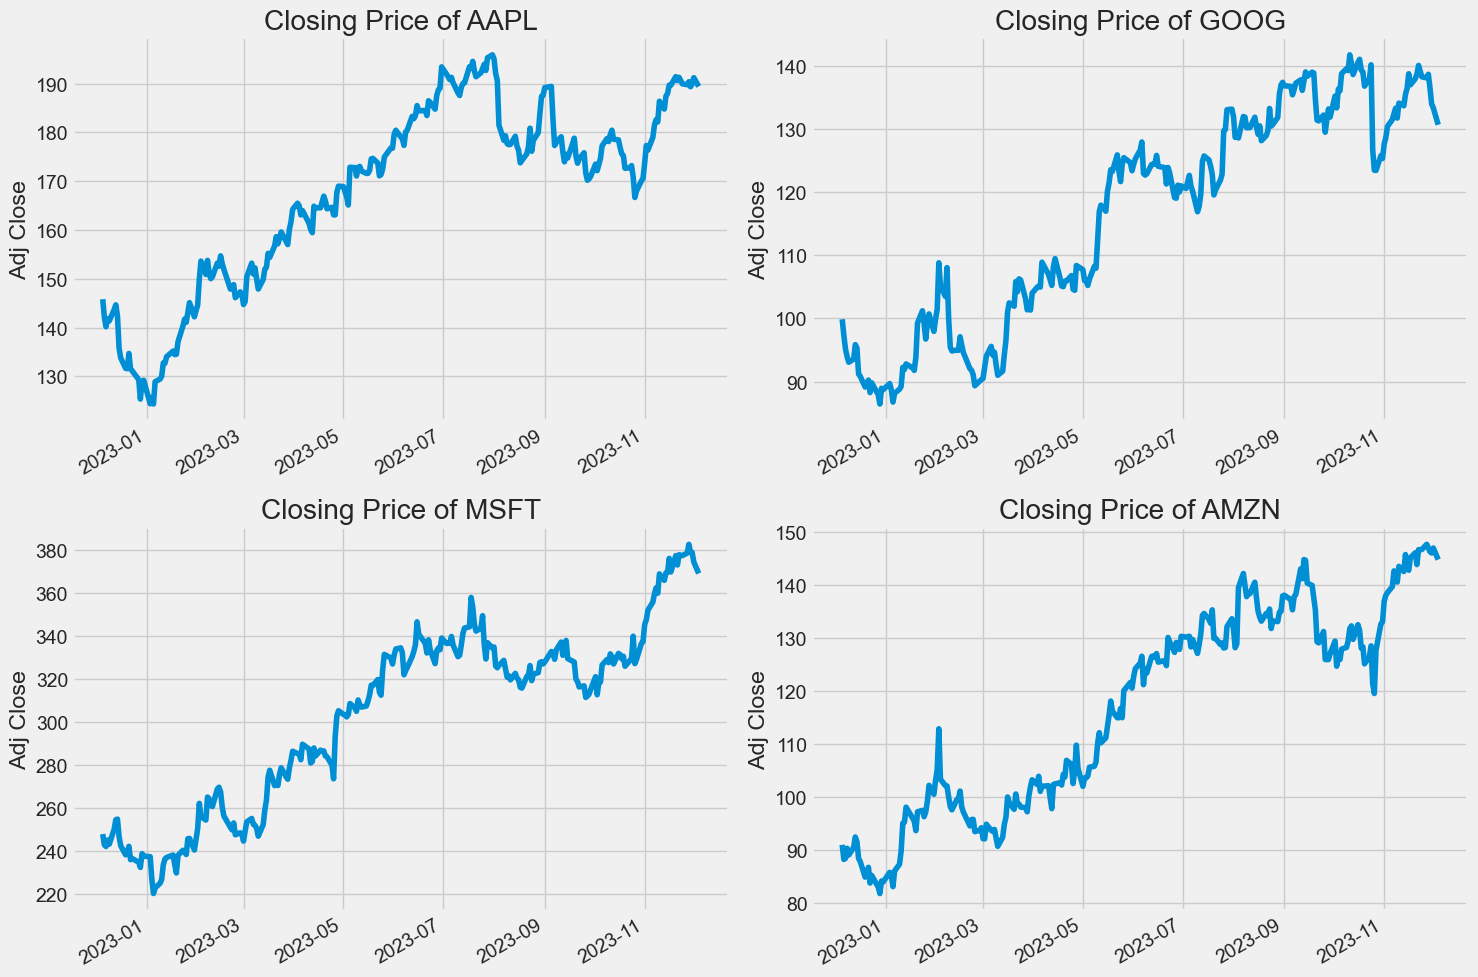

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

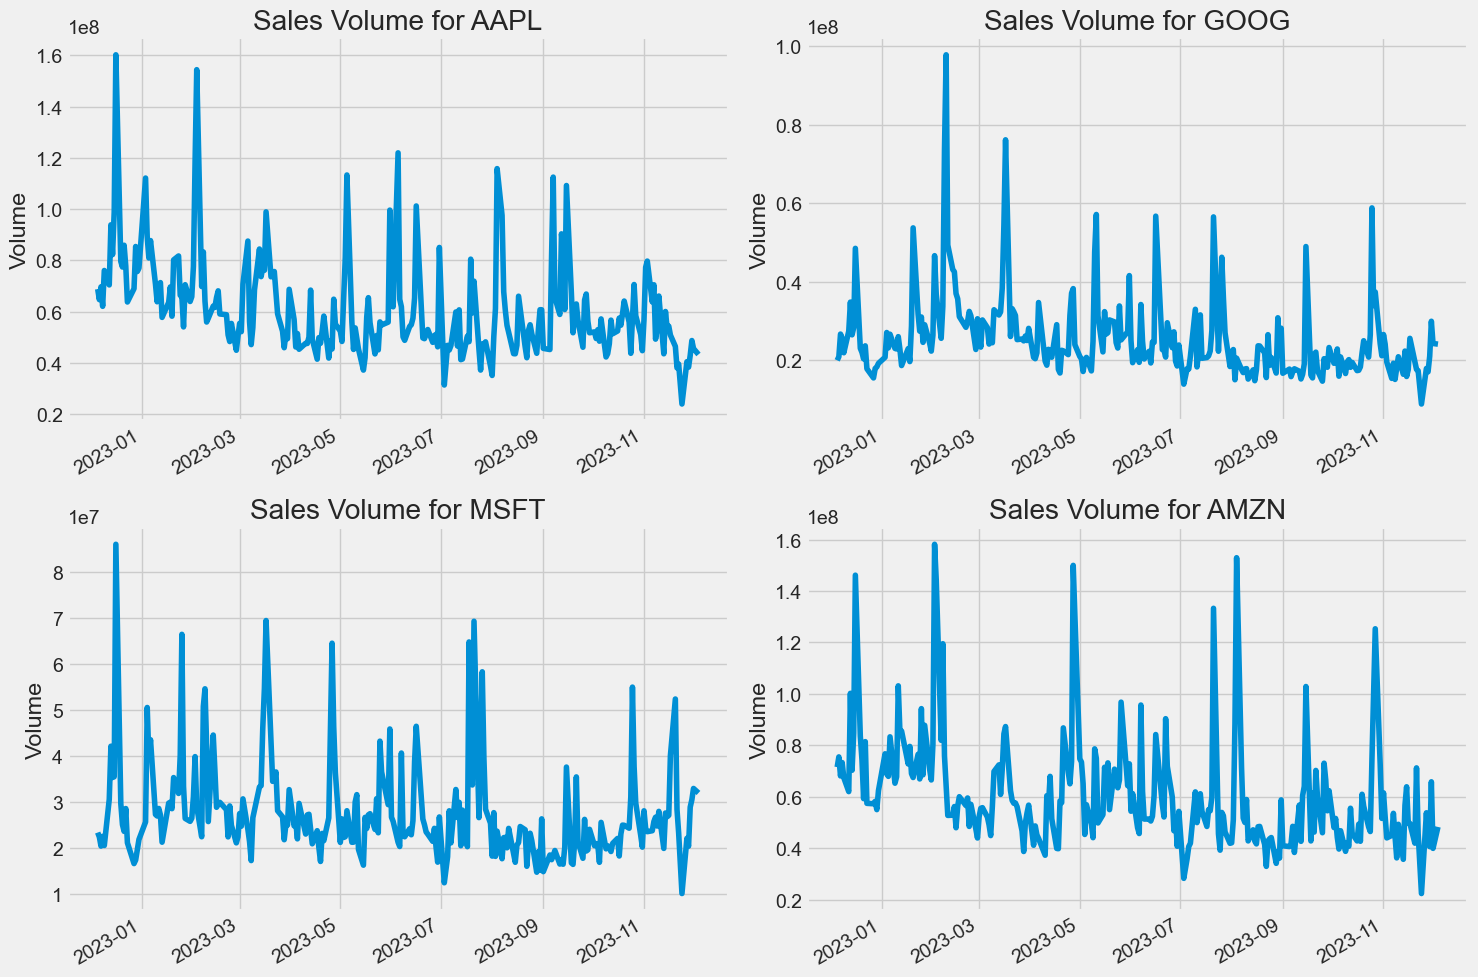

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

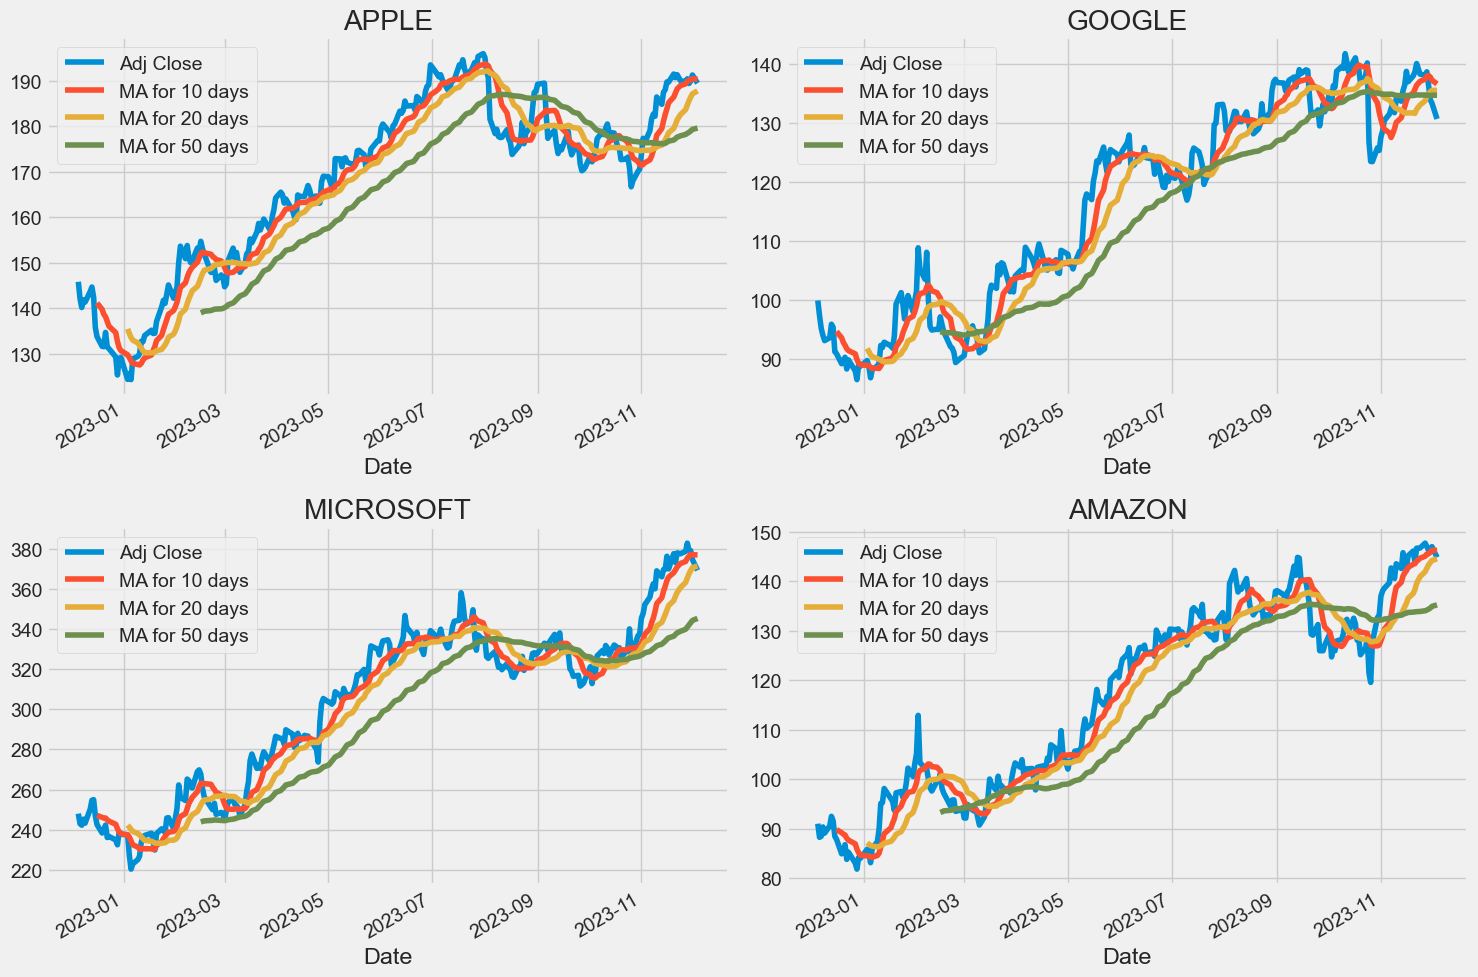

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

 A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend. We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

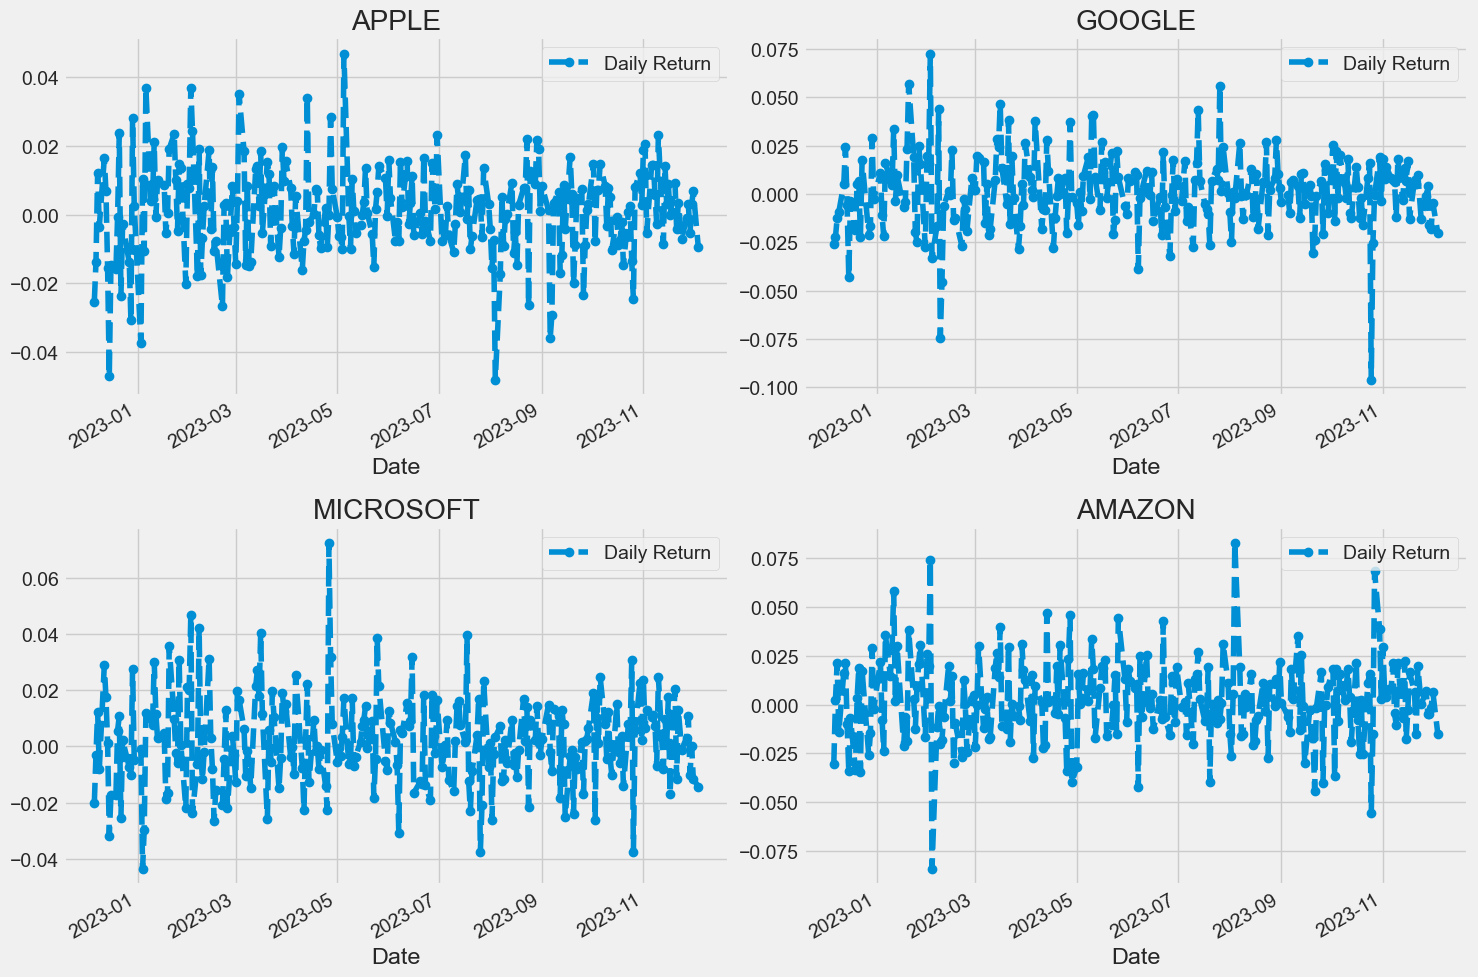

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

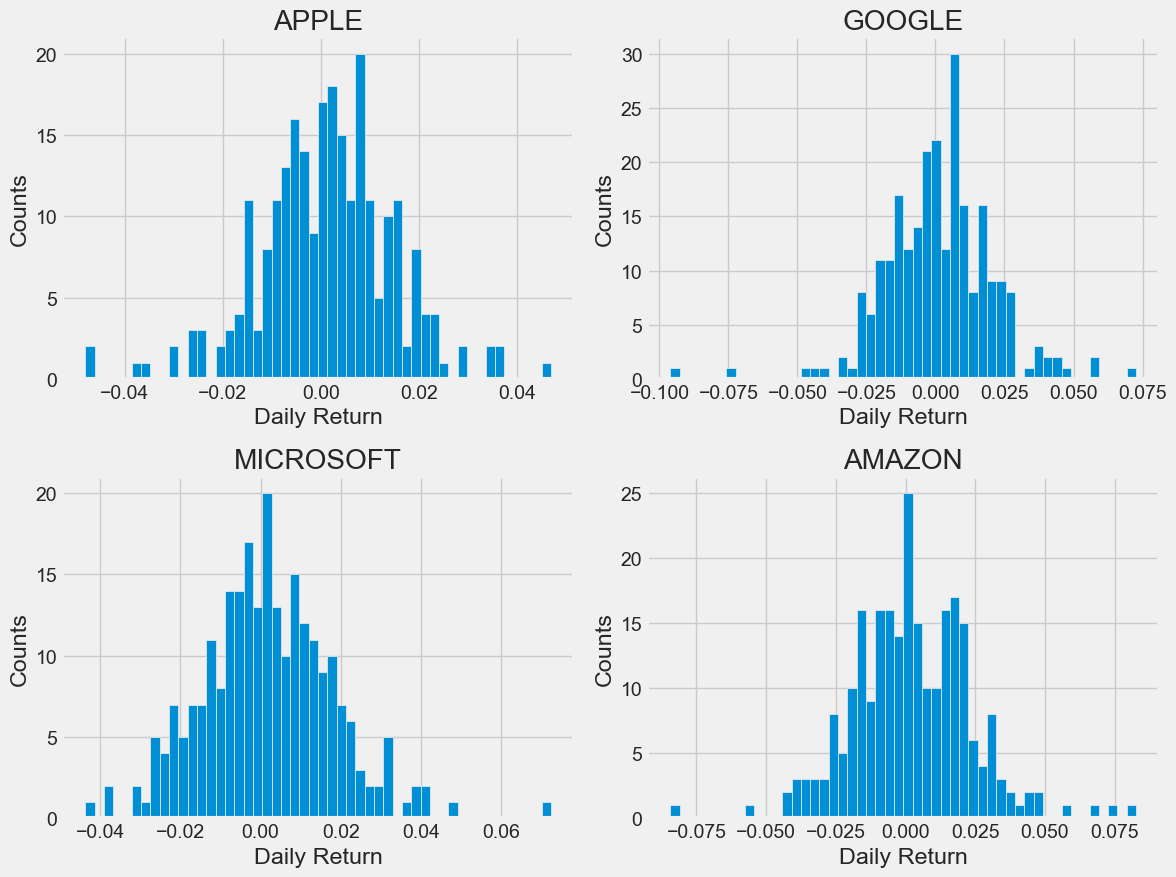

In [8]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

Statistic: nan, p-value: 1.0


c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


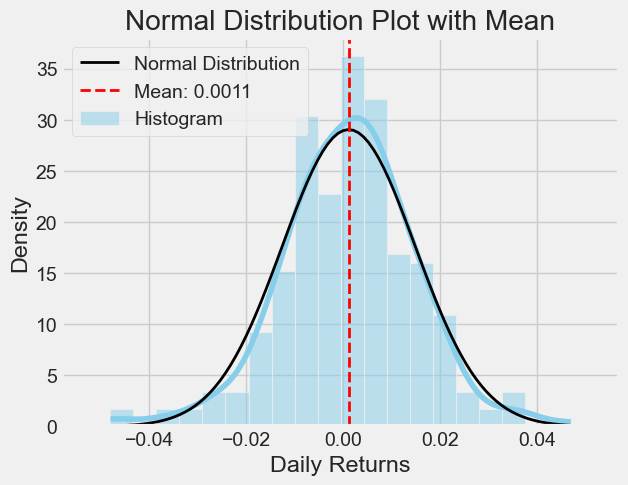

Statistic: nan, p-value: 1.0


c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


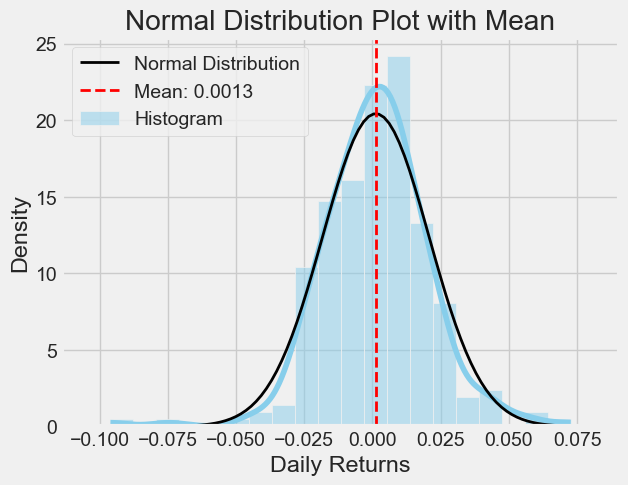

Statistic: nan, p-value: 1.0


c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


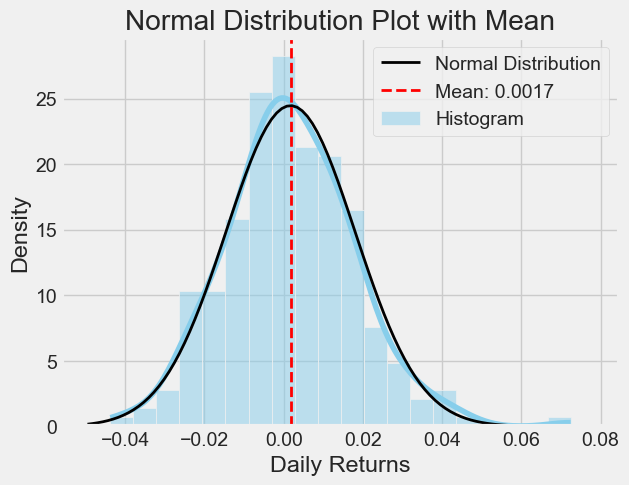

Statistic: nan, p-value: 1.0


c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


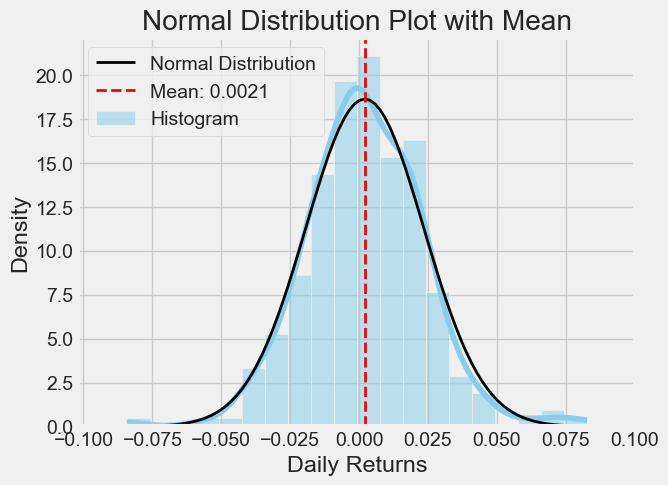

In [9]:
from scipy.stats import shapiro, norm
for k in company_list:
 daily_returns = k['Daily Return']

 statistic, p_value = shapiro(daily_returns)

# Print the results
 print(f'Statistic: {statistic}, p-value: {p_value}')

# Create a normal distribution plot
 sns.histplot(daily_returns, kde=True, stat='density', color='skyblue', bins=20, label='Histogram')

# Plot the normal distribution with mean and variance
 xmin, xmax = plt.xlim()
 x = np.linspace(xmin, xmax, 100)
 p = norm.pdf(x, daily_returns.mean(), daily_returns.std())
 plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Mark mean on the plot
 plt.axvline(daily_returns.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {daily_returns.mean():.4f}')

# Add labels and legend
 plt.title('Normal Distribution Plot with Mean')
 plt.xlabel('Daily Returns')
 plt.ylabel('Density')
 plt.legend()

# Show the plot
 plt.show()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-05,NaN,NaN,NaN,NaN
2022-12-06,-0.025370,-0.030326,-0.025633,-0.020304
2022-12-07,-0.013785,0.002380,-0.022197,-0.003060
2022-12-08,0.012133,0.021366,-0.012612,0.012399
2022-12-09,-0.003435,-0.013946,-0.009367,-0.008003


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

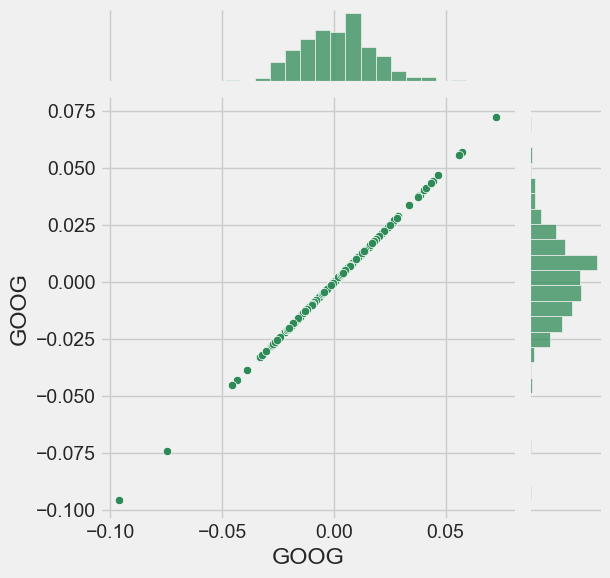

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

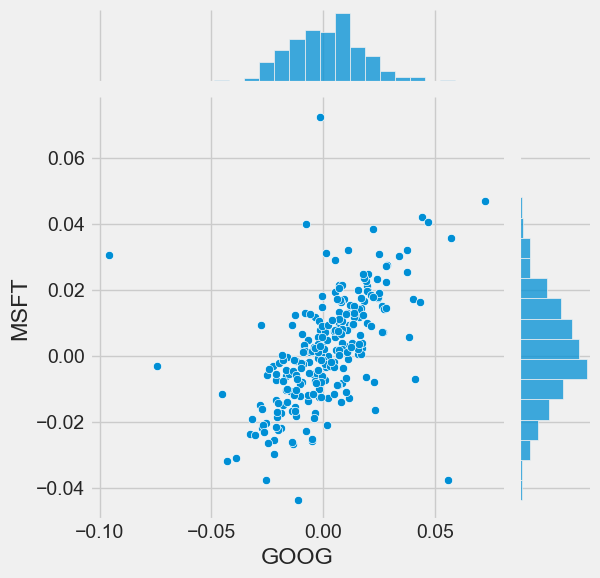

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positively) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

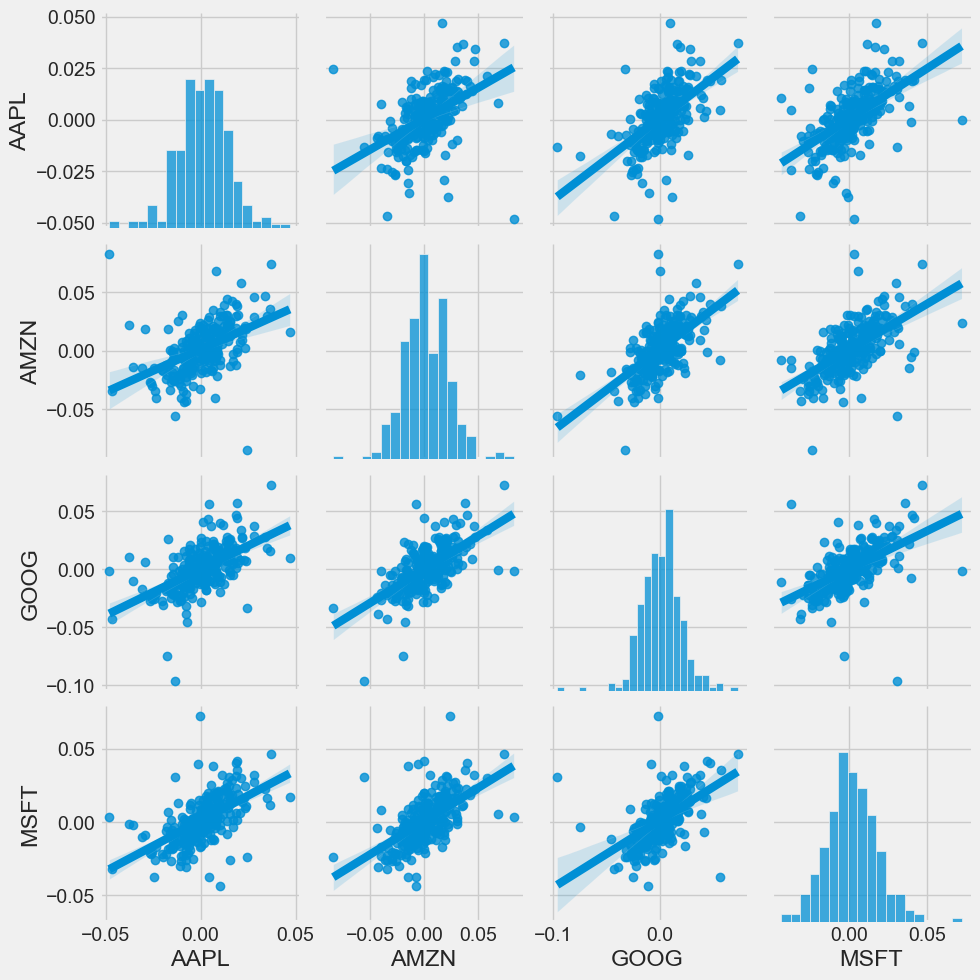

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.


c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

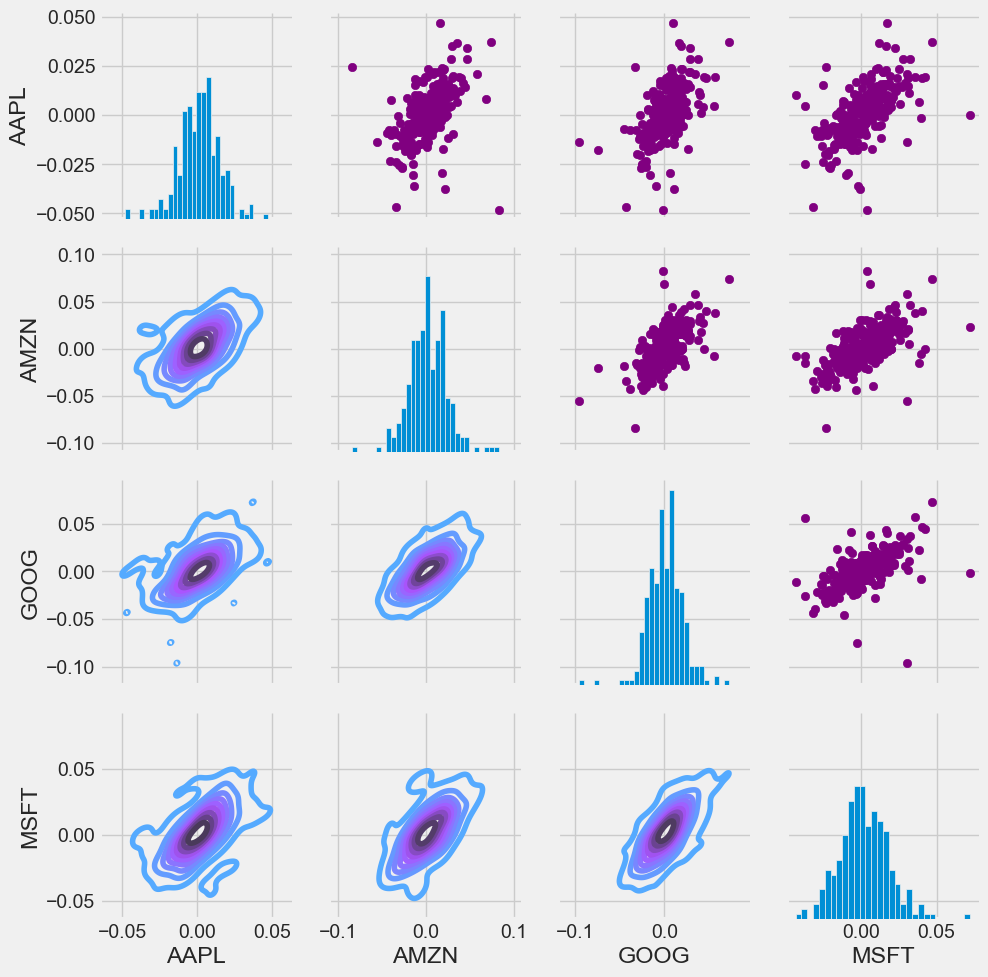

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Seaborn Kdeplots can even be used to plot the data against multiple data variables or bivariate variables to depict the probability distribution of one with respect to the other values. This is done using contour plots under seaborn.

'Contour plots' or 'level plots' are a tool for doing multivariate analysis and visualizing 3-D plots in 2-D space. If we consider X and Y as our variables we want to plot then the response Z will be plotted as slices on the X-Y plane due to which contours are sometimes referred as Z-slices or iso-response.

c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\prati\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

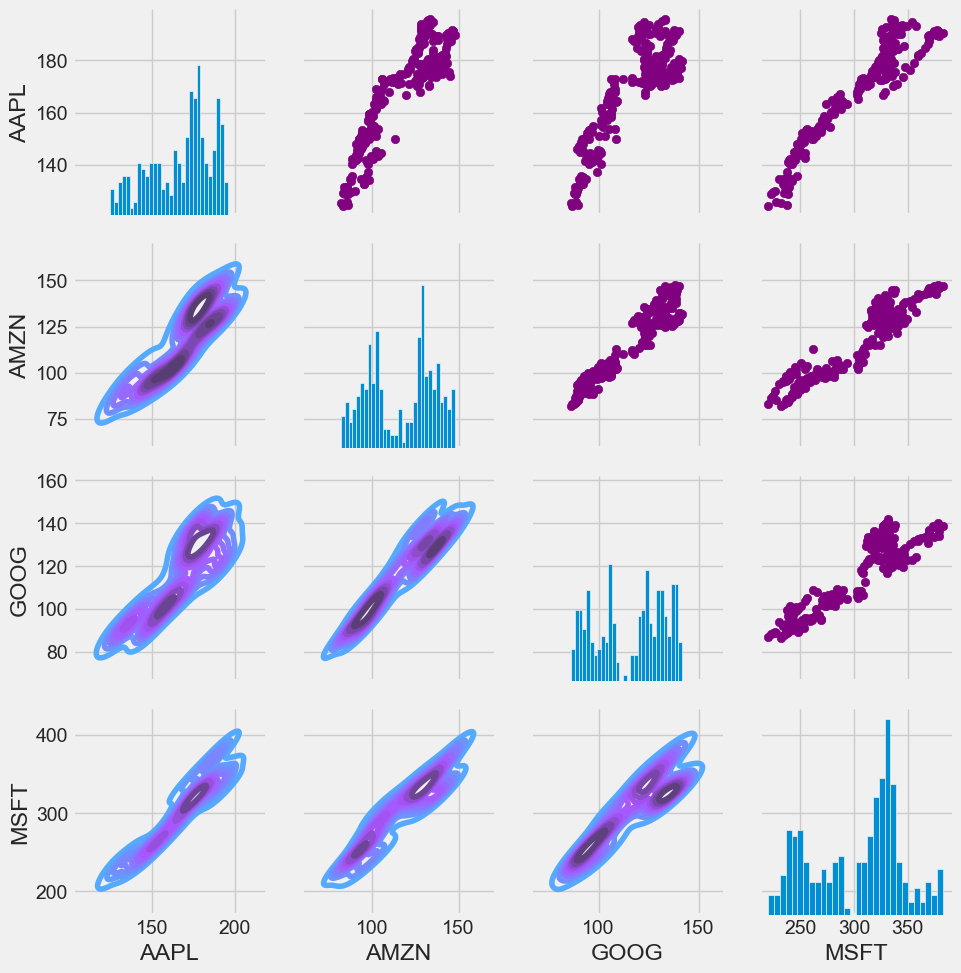

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

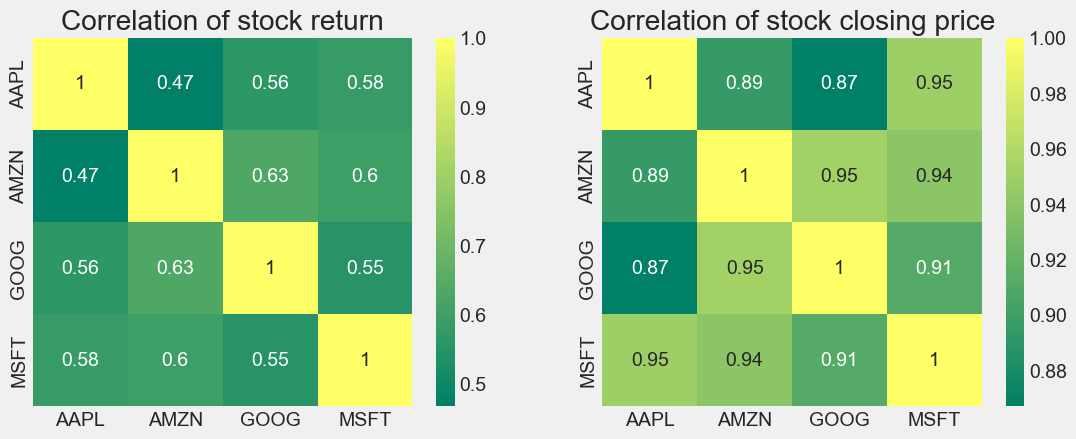

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

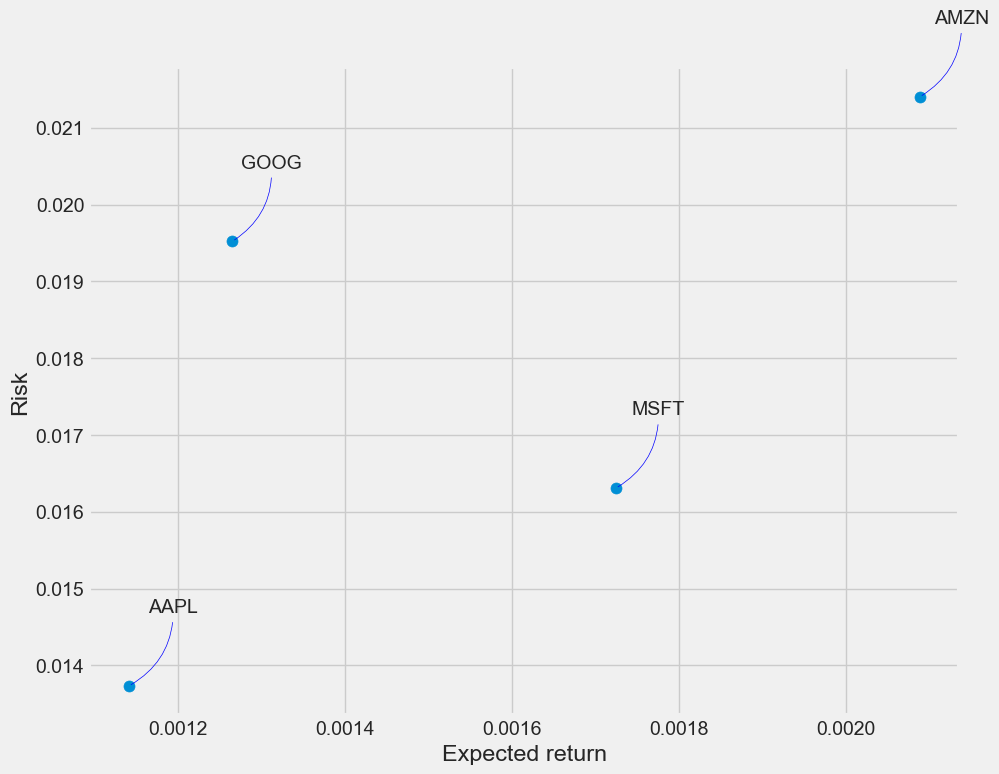

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Simple Predicting the closing price stock price of APPLE inc using no Feature Extraction:

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516595,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400


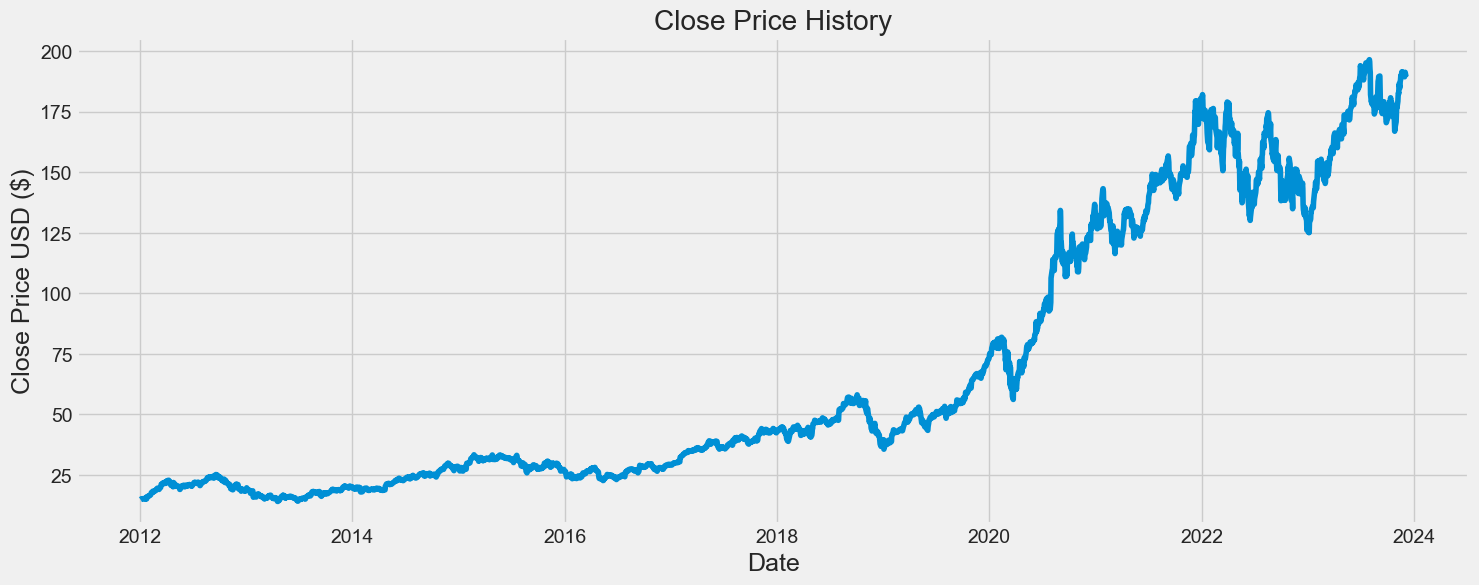

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2850

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.96438405],
       [0.97145249],
       [0.96153475]])

In [22]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

LSTM is an artificial recurrent neural network used in deep learning and can process entire sequences of data. Due to the model's ability to learn long term sequences of observations, LSTM has become a trending approach to time series forecasting.

A special architecture allows the LSTM model to decide whether to retain previous information in short-term memory or discard it.The LSTM cell adds long-term memory in an even more performant way because it allows even more parameters to be learned.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2790/2790 [==============================] - 59s 20ms/step - loss: 0.0012


Default activation function for LSTM is 'tanh'.

We add an LSTM layer with 128 units. `input_shape=(x_train.shape[1], 1)` defines the input shape of the data. `x_train.shape[1]` indicates the number of time steps in each input sequence, and `1` indicates the number of features in each time step.

We add yet another LSTM layer with 64 units. This LSTM layer will not return sequences, only the output at the last time step.

`model.add(Dense(25))` adds a fully connected (Dense) layer with 25 units after the LSTM layers.

`model.add(Dense(1))` adds a final Dense layer with 1 unit, which is the output layer for the regression task.

In [24]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 24ms/step


4.460724164724934

C:\Users\prati\AppData\Local\Temp\ipykernel_14844\4156331827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


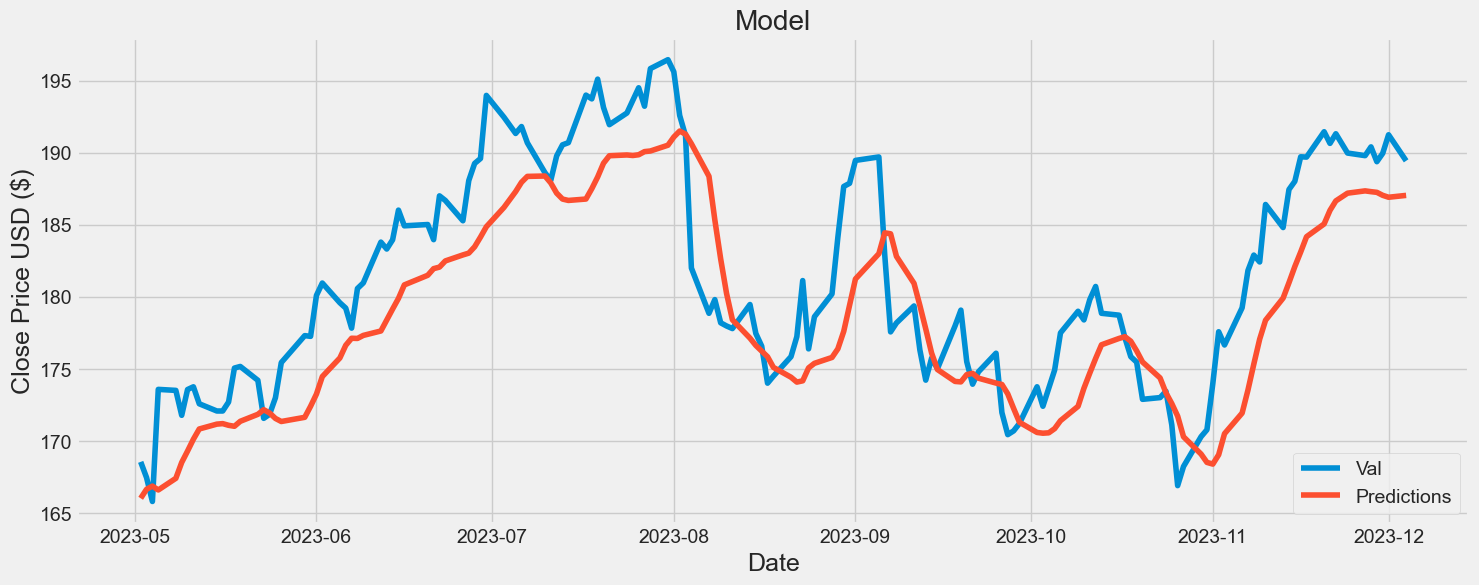

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-05-02,168.539993,166.012527
2023-05-03,167.449997,166.637543
2023-05-04,165.789993,166.860565
2023-05-05,173.570007,166.587982
2023-05-08,173.500000,167.398712
...,...,...
2023-11-28,190.399994,187.290268
2023-11-29,189.369995,187.244171
2023-11-30,189.949997,187.036789


The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30.

In [27]:
# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)


Bollinger Bands is a technical analysis tool to generate oversold or overbought signals and was developed by John Bollinger.

Three lines compose Bollinger Bands: A simple moving average, or the middle band, and an upper and lower band. The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average and can be modified.

When the price continually touches the upper Bollinger Band, it can indicate an overbought signal. If the price continually touches the lower band it can indicate an oversold signal.

In [28]:
# Add Momentum_1D column for all 15 stocks.
# Momentum_1D = P(t) - P(t-1)

df['Momentum_1D'] = (df['Close']-df['Close'].shift(1)).fillna(0)
df['RSI_14D'] = df['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
df['Volume_plain'] = df['Volume'].fillna(0)

df['BB_Middle_Band'], df['BB_Upper_Band'], df['BB_Lower_Band'] = bbands(df['Close'], length=20, numsd=1)
df['BB_Middle_Band'] = df['BB_Middle_Band'].fillna(0)
df['BB_Upper_Band'] = df['BB_Upper_Band'].fillna(0)
df['BB_Lower_Band'] = df['BB_Lower_Band'].fillna(0)


df['VWAP'] = np.cumsum(df['Volume'] * (df['High'] +df['Low'])/2) / np.cumsum(df['Volume'])
df['HL'] = df['High'] - df['Low']
df['absHC'] = abs(df['High'] - df['Close'].shift(1))
df['absLC'] = abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['HL','absHC','absLC']].max(axis=1)
df['ATR'] = df['TR'].rolling(window=14).mean()
df['NATR'] = (df['ATR'] / df['Close']) *100
df =df.fillna(0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,VWAP,HL,absHC,absLC,TR,ATR,NATR
Date,,,,,,,,,,,,,,,,,,,
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.610001,68.775332,38415400,184.746,191.044,178.448,43.523100,1.680008,1.290009,0.389999,1.680008,2.317857,1.217362
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999,68.620700,43014200,185.676,191.116,180.236,43.534057,3.119995,1.690002,1.429993,3.119995,2.407857,1.271509
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002,65.344467,48794400,186.475,191.237,181.713,43.546376,2.130005,0.950012,1.179993,2.130005,2.395000,1.260858
2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,1.290009,59.659820,45679300,187.158,191.541,182.776,43.557997,2.330002,1.610001,0.720001,2.330002,2.264285,1.184002
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43363600,-1.810013,58.661823,43363600,187.797,191.435,184.160,43.568904,2.600006,1.190002,3.790009,3.790009,2.378573,1.255647


Text(0, 0.5, 'Close Prices')

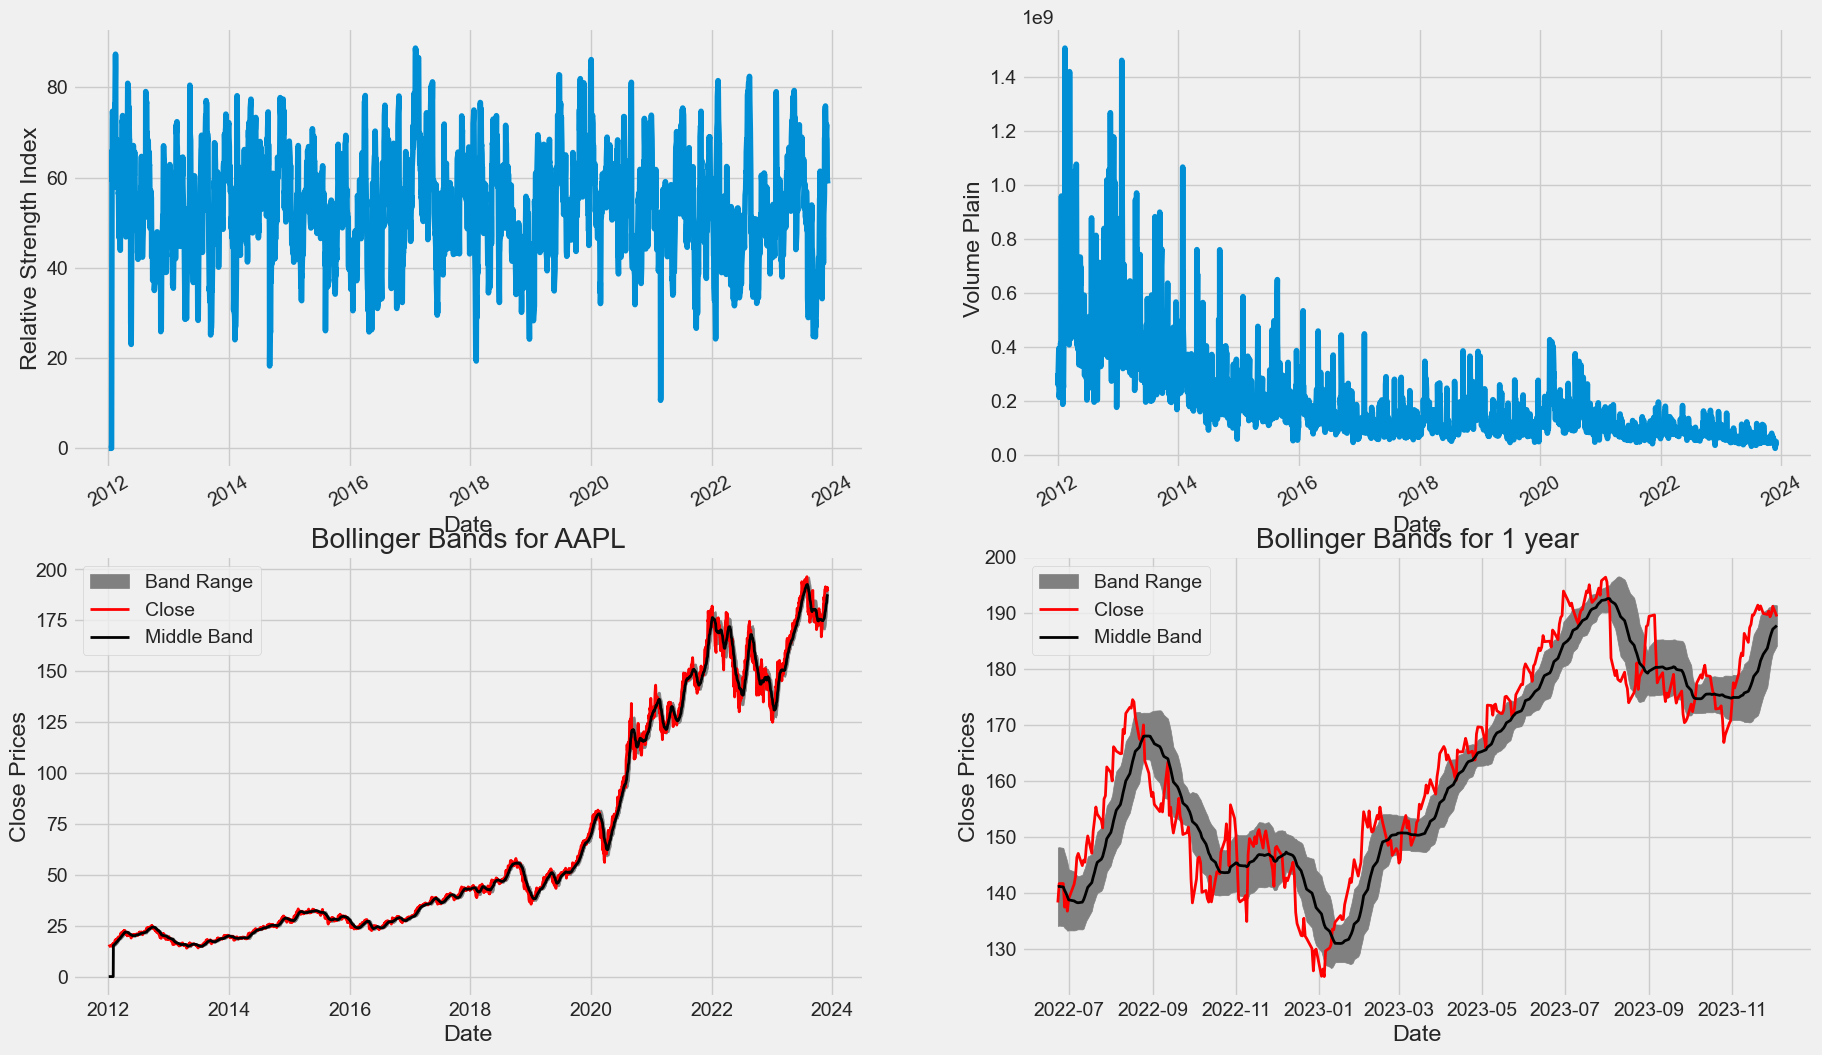

In [29]:
plt.figure(figsize=(20,25))
#RSI
plt.subplot(4,2,1)
plt.plot(df.index, df['RSI_14D'])
plt.xlabel("Date")
plt.ylabel("Relative Strength Index")
plt.xticks(rotation=30)

#Volume plain
plt.subplot(4,2,2)
plt.plot(df.index, df['Volume_plain'])
plt.xlabel("Date")
plt.ylabel("Volume Plain")
plt.xticks(rotation=30)

#Bollinger Band
plt.subplot(4,2,3)

plt.fill_between(df.index, df['BB_Upper_Band'], df['BB_Lower_Band'], color='grey', label="Band Range")
# Plot Adjust Closing Price and Moving Averages

plt.plot(df.index, df['Close'], color='red', lw=2, label="Close")
plt.plot(df.index, df['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
plt.title("Bollinger Bands for AAPL" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Prices")
#LAst year Bolliger Band
subdf = df.tail(365)
plt.subplot(4,2,4)
plt.fill_between(subdf.index, subdf['BB_Upper_Band'], subdf['BB_Lower_Band'], color='grey', label="Band Range")
plt.plot(subdf.index, subdf['Close'], color='red', lw=2, label="Close")
plt.plot(subdf.index, subdf['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
plt.title("Bollinger Bands for 1 year" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Prices")


(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

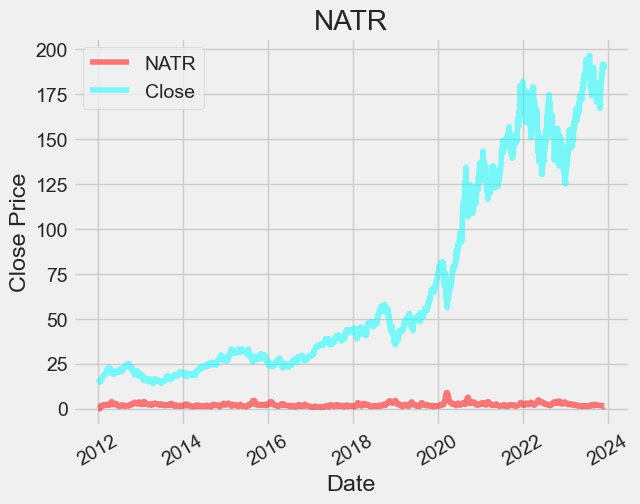

In [30]:

plt.plot(df.index, df['NATR'], 'red', label="NATR", alpha = 0.5)
plt.plot(df.index, df['Close'], 'cyan', label="Close", alpha = 0.5)
plt.title("NATR" )
plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=30)

1. NATR (Normalized Average True Range): NATR is a technical analysis indicator that measures market volatility by calculating the average true range (ATR) over a specified period, typically 14 days. It normalizes the ATR values to a percentage, providing insights into the volatility level relative to the stock's price.

2. VWAP (Volume-Weighted Average Price): VWAP is a trading benchmark used by investors and traders to assess the average price a stock has traded at throughout the day, considering both the price and volume traded. It's calculated by dividing the total value traded (price multiplied by volume) by the total volume traded during a specific period.

3. BB_Middle_Band (Bollinger Bands Middle Band): BB_Middle_Band represents the middle line in the Bollinger Bands indicator, calculated by taking the simple moving average (SMA) of a stock's price over a specified period, usually 20 days. Bollinger Bands consist of three lines: the middle band (SMA), an upper band (SMA plus two standard deviations), and a lower band (SMA minus two standard deviations). They help assess price volatility and potential price reversal points.

4. RSI_14D (Relative Strength Index - 14 Days): RSI_14D is a momentum oscillator that measures the speed and change of price movements. It compares the magnitude of recent gains to recent losses over a 14-day period, indicating whether a stock is overbought or oversold. RSI values range from 0 to 100, with levels above 70 suggesting overbought conditions and levels below 30 indicating oversold conditions.

5. Volume_plain (Volume): In the context of the stock market, volume refers to the number of shares or contracts traded within a specific period. It helps traders and investors analyze the significance and strength of price movements. Higher volume often accompanies significant price changes, indicating increased investor interest or activity.

6. Momentum_1D (Momentum - 1 Day): Momentum_1D is a technical indicator that measures the rate of change in a stock's price over a single trading day. It quantifies the strength of a price trend, showing whether the stock is gaining or losing strength and momentum within a short-term period.

7. Adj Close (Adjusted Close): Adj Close refers to the adjusted closing price of a stock. It represents the final price at the end of a trading day, accounting for any corporate actions such as dividends, stock splits, or other adjustments. The adjusted close price is commonly used in financial analysis and charting to assess a stock's historical performance accurately.

In [31]:
fc= ['NATR','VWAP', 'BB_Middle_Band', 'RSI_14D','Volume_plain','Momentum_1D','Adj Close']
feature_minmax_transform_data = scaler.fit_transform(df[fc])
feature_minmax_transform = pd.DataFrame(columns=fc, data=feature_minmax_transform_data, index=df.index)
feature_minmax_transform.median()

NATR              0.229413
VWAP              0.277132
BB_Middle_Band    0.210674
RSI_14D           0.602672
Volume_plain      0.071919
Momentum_1D       0.468361
Adj Close         0.144836
dtype: float64

In [32]:
display(feature_minmax_transform.head())
target_adj_close = pd.DataFrame(df['Adj Close'])
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 20 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,NATR,VWAP,BB_Middle_Band,RSI_14D,Volume_plain,Momentum_1D,Adj Close
Date,,,,,,,
2012-01-03,0.0,0.000000,0.0,0.0,0.187692,0.467140,0.002458
2012-01-04,0.0,0.000703,0.0,0.0,0.159219,0.470645,0.002822
2012-01-05,0.0,0.002429,0.0,0.0,0.166808,0.474420,0.003578
2012-01-06,0.0,0.005253,0.0,0.0,0.198536,0.474071,0.004297
2012-01-09,0.0,0.008261,0.0,0.0,0.249634,0.466078,0.004187


Shape of features :  (3000, 7)
Shape of target :  (3000, 1)


,NATR,VWAP,BB_Middle_Band,RSI_14D,Volume_plain,Momentum_1D,Adj Close
Date,,,,,,,
2023-11-27,0.144768,0.998077,0.953839,0.809030,0.011136,0.459147,0.966634
2023-11-28,0.136760,0.998415,0.959062,0.775662,0.009694,0.494227,0.969951
2023-11-29,0.142843,0.998794,0.963890,0.773918,0.012797,0.421403,0.964351
2023-11-30,0.141647,0.999220,0.968038,0.736968,0.016697,0.492895,0.967504
2023-12-01,0.133013,0.999623,0.971583,0.672855,0.014595,0.524423,0.974518


,Adj Close
Date,
2023-11-27,190.399994
2023-11-28,189.369995
2023-11-29,189.949997
2023-11-30,191.240005
2023-12-01,189.429993



 -----After process------ 

Shape of features :  (2910, 7)
Shape of target :  (2910, 1)


,Adj Close
Date,
2023-07-21,192.236801
2023-07-24,193.104492
2023-07-25,193.982147
2023-07-26,192.705551
2023-07-27,195.308609


In [33]:
from sklearn.model_selection import TimeSeriesSplit
ts_split= TimeSeriesSplit(n_splits=800)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates

def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  14.401583872395653
R2 score:  -3.305876444069506


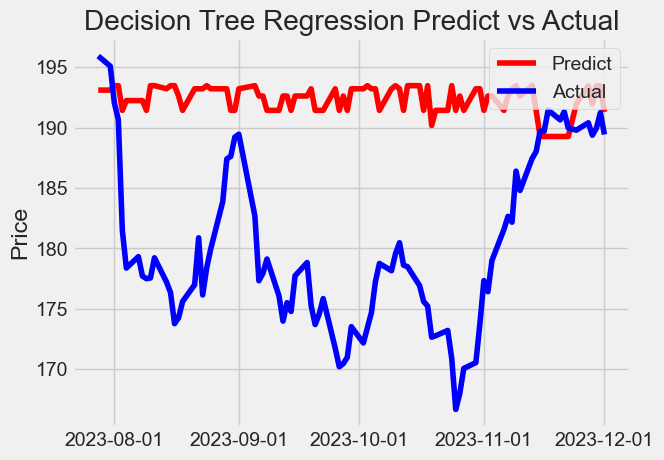

          Feature  Importance
1            VWAP    0.885485
6       Adj Close    0.113867
0            NATR    0.000208
2  BB_Middle_Band    0.000138
4    Volume_plain    0.000126
5     Momentum_1D    0.000095
3         RSI_14D    0.000080


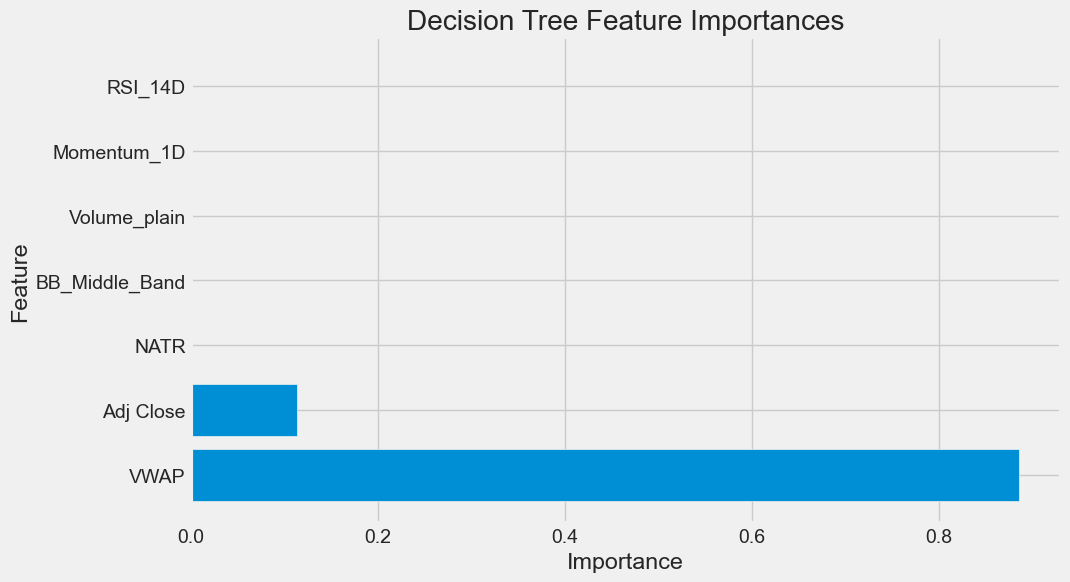

In [35]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=5)
clf_dt = clf.fit(X_train, y_train)
validate_result(clf_dt, 'Decision Tree Regression')
feature_importances = clf.feature_importances_
# Get the names of the features
feature_names = list(fc)  # Assuming you have column names

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()


In [43]:
df['VwapC'] = (df['VWAP']*0.01+df['Close']*0.99 ) 
df

,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,VWAP,HL,absHC,absLC,TR,ATR,NATR,VwapC
Date,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800,0.000000,0.000000,302220800,0.000,0.000,0.000,14.669643,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,14.686614
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516595,260022000,0.078928,0.000000,260022000,0.000,0.000,0.000,14.689959,0.192858,0.123215,0.069643,0.192858,0.000000,0.000000,14.764956
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600,0.163929,0.000000,271269600,0.000,0.000,0.000,14.739836,0.210000,0.182500,0.027500,0.210000,0.000000,0.000000,14.927745
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800,0.156072,0.000000,318292800,0.000,0.000,0.000,14.821452,0.126071,0.168571,0.042500,0.168571,0.000000,0.000000,15.083072
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400,-0.023929,0.000000,394024400,0.000,0.000,0.000,14.908383,0.228572,0.191072,0.037500,0.228572,0.000000,0.000000,15.060252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.610001,68.775332,38415400,184.746,191.044,178.448,43.523100,1.680008,1.290009,0.389999,1.680008,2.317857,1.217362,188.931225
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999,68.620700,43014200,185.676,191.116,180.236,43.534057,3.119995,1.690002,1.429993,3.119995,2.407857,1.271509,187.911636
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002,65.344467,48794400,186.475,191.237,181.713,43.546376,2.130005,0.950012,1.179993,2.130005,2.395000,1.260858,188.485961


In [44]:

data = df.filter(['VwapC'])
dataset = data.values
dataset
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model.fit(x_train, y_train, batch_size=1, epochs=1)
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions2 = model.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

rmse2 = np.sqrt(np.mean(((predictions2 - y_test) ** 2)))
rmse2

[array([0.00376896, 0.00420201, 0.00510187, 0.00596049, 0.00583434,
       0.00613125, 0.00599697, 0.00577066, 0.00546199, 0.00641871,
       0.00728219, 0.00701778, 0.0055623 , 0.00695257, 0.00558463,
       0.01072461, 0.01033001, 0.01084975, 0.01197211, 0.01265323,
       0.01259851, 0.01239056, 0.01328366, 0.01412387, 0.01507623,
       0.016614  , 0.01984633, 0.01990144, 0.02170093, 0.02304641,
       0.02075652, 0.02164905, 0.02163474, 0.02412662, 0.02377589,
       0.02443405, 0.02561335, 0.02627158, 0.02816175, 0.02954285,
       0.0299444 , 0.03008608, 0.0277413 , 0.02717774, 0.02726515,
       0.02947607, 0.03009972, 0.03143675, 0.03458761, 0.03879622,
       0.03801858, 0.0380255 , 0.04106663, 0.04202169, 0.0413496 ,
       0.04073564, 0.04009499, 0.0422345 , 0.04370396, 0.04432159])]
[0.04280827686991147]

[array([0.00376896, 0.00420201, 0.00510187, 0.00596049, 0.00583434,
       0.00613125, 0.00599697, 0.00577066, 0.00546199, 0.00641871,
       0.00728219, 0.00701778, 0.00

5/5 [==============================] - 0s 26ms/step


3.132945939563244

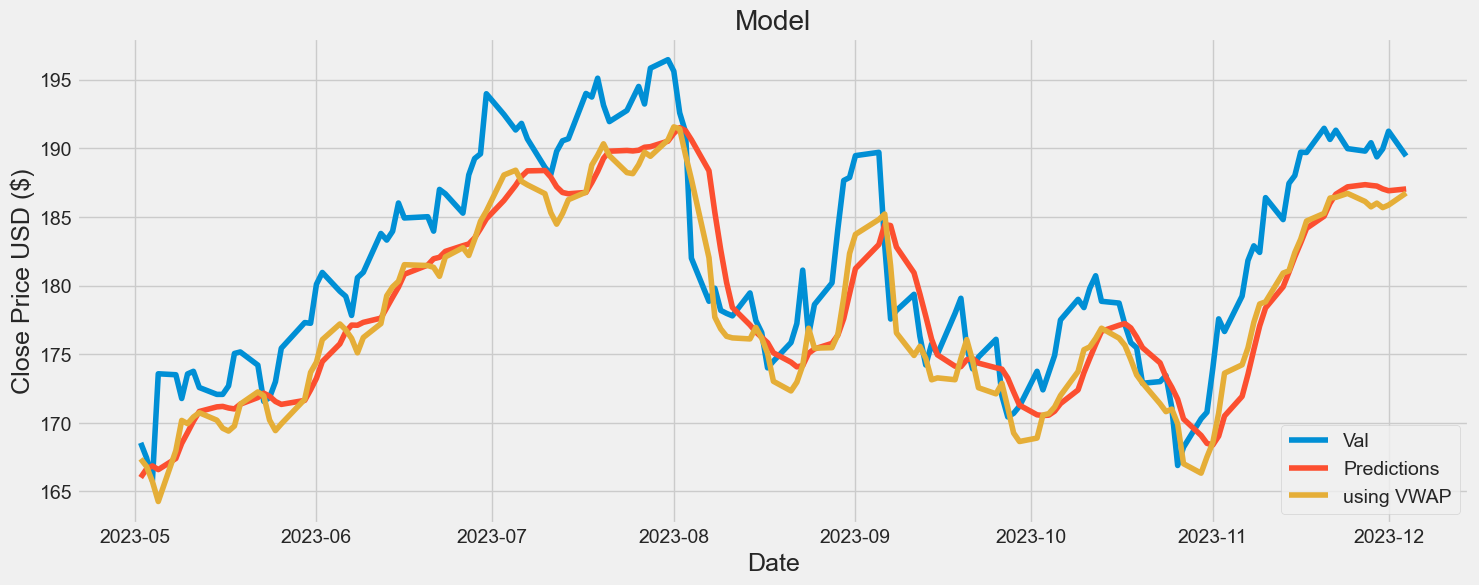

In [45]:
# Plot the data

valid['Prediction2'] = predictions2


# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions','Prediction2']])
plt.legend(['Val', 'Predictions','using VWAP'], loc='lower right')
plt.show()

# Improvement


In [46]:
improvement_percentage = ((rmse - rmse2) / rmse) * 100

print(f"Improvement Percentage: {improvement_percentage:.2f}%")

Improvement Percentage: 29.77%


In [47]:
df

,Open,High,Low,Close,Adj Close,Volume,Momentum_1D,RSI_14D,Volume_plain,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,VWAP,HL,absHC,absLC,TR,ATR,NATR,VwapC
Date,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800,0.000000,0.000000,302220800,0.000,0.000,0.000,14.669643,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,14.686614
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516595,260022000,0.078928,0.000000,260022000,0.000,0.000,0.000,14.689959,0.192858,0.123215,0.069643,0.192858,0.000000,0.000000,14.764956
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600,0.163929,0.000000,271269600,0.000,0.000,0.000,14.739836,0.210000,0.182500,0.027500,0.210000,0.000000,0.000000,14.927745
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800,0.156072,0.000000,318292800,0.000,0.000,0.000,14.821452,0.126071,0.168571,0.042500,0.168571,0.000000,0.000000,15.083072
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400,-0.023929,0.000000,394024400,0.000,0.000,0.000,14.908383,0.228572,0.191072,0.037500,0.228572,0.000000,0.000000,15.060252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.610001,68.775332,38415400,184.746,191.044,178.448,43.523100,1.680008,1.290009,0.389999,1.680008,2.317857,1.217362,188.931225
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,-1.029999,68.620700,43014200,185.676,191.116,180.236,43.534057,3.119995,1.690002,1.429993,3.119995,2.407857,1.271509,187.911636
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,0.580002,65.344467,48794400,186.475,191.237,181.713,43.546376,2.130005,0.950012,1.179993,2.130005,2.395000,1.260858,188.485961
